Here we would like to test the Hypothesis, whether our groups based on graduation rates are significantly differ from each other.

H0: There is no significant difference in financing between graduation groups
HA: There is a significant difference in financing between graduation groups


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline


In [2]:
#oped the data frame
df= pd.read_csv("Sources/df_clustered.csv")
df


,Unnamed: 0,Amount,GR_RATE,Function_Accounts Receivable,Function_Approved Textbooks and Core Curricula Materials,Function_Books and Other Reference Materials,Function_Classified Instructional Salaries,Function_Classified Support Salaries,Function_Communications,Function_Insurance,Function_Maintenance and Operations (Public Law 81-874),Function_Subagreements for Services,Function_Transfers of Indirect Costs,Function_Transfers of Indirect Costs - Interfund,Function_Tuition for Instruction Under Interdistrict Attendance Agreements
0,0,72191.81,<25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,431693.15,<25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,175536.15,<25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,3619.38,<25%,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,505109.22,<25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,1773,5390812.35,25%-50%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1770,1774,1058553.95,25%-50%,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1771,1775,1030832.20,25%-50%,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1772,1776,358.50,25%-50%,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Drop column Unnamed: 0
df = df.drop(columns = ['Unnamed: 0'])
df

,Amount,GR_RATE,Function_Accounts Receivable,Function_Approved Textbooks and Core Curricula Materials,Function_Books and Other Reference Materials,Function_Classified Instructional Salaries,Function_Classified Support Salaries,Function_Communications,Function_Insurance,Function_Maintenance and Operations (Public Law 81-874),Function_Subagreements for Services,Function_Transfers of Indirect Costs,Function_Transfers of Indirect Costs - Interfund,Function_Tuition for Instruction Under Interdistrict Attendance Agreements
0,72191.81,<25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,431693.15,<25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,175536.15,<25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3619.38,<25%,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,505109.22,<25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,5390812.35,25%-50%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1770,1058553.95,25%-50%,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1771,1030832.20,25%-50%,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1772,358.50,25%-50%,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


ANOVA Assumptions

1. The dependent variable (Graduation rates) should be continuous. -- done
2. The independent variables (Clusters) should be two or more categorical groups -- done
3. There must be different participants in each group with no participant being in more than one group. In our case, students couldn't belong to more than one district, districts could'n belong to more than one cluster -- done
4. The dependent variable should be approximately normally distributed for each category. 
5. Variances of each group are approximately equal.

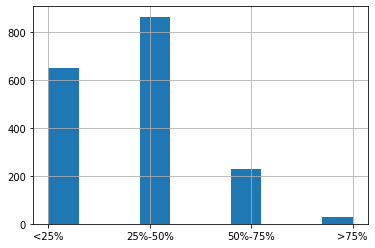

In [5]:
#Check Normal distribution across groups through visual inspection (Assumption 4)
df.GR_RATE.hist()


We assume normal distribution

To test the 5th ANOVA assuption we will use Levene's Test for equality of variances

H0: variances across clusters are equal

HA: variances across clusters are not equal

In [6]:
Cluster_1 = df.loc[df['GR_RATE'] == '<25%']
Cluster_2 = df.loc[df['GR_RATE'] == '25%-50%']
Cluster_3 = df.loc[df['GR_RATE'] == '50%-75%']
Cluster_4 = df.loc[df['GR_RATE'] == '>75%']
grad_1 = Cluster_1.Amount
grad_2 = Cluster_2.Amount
grad_3 = Cluster_3.Amount
grad_4 = Cluster_4.Amount
stats.levene(grad_1, grad_2, grad_3, grad_4)


LeveneResult(statistic=9.186756145745399, pvalue=4.958513159913228e-06)

As we see from Levene's test p-value is larger than 0.05, so we keep H0, that mean that variances across clusters are equal.

Assuption 5 is met

In [7]:
df.Cluster = df.GR_RATE.astype(str)

/Users/dbeliankou/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [8]:
model = smf.ols('Amount~GR_RATE', data = df).fit()
table = sm.stats.anova_lm(model, typ=1)
table

,df,sum_sq,mean_sq,F,PR(>F)
GR_RATE,3.0,4.979139e+16,1.659713e+16,11.382242,2.150737e-07
Residual,1770.0,2.580943e+18,1.458160e+15,NaN,NaN


Here we observe that our p-value is smaller than 0.05, so we will regect H0 and keep HA. It means that there is a significant difference between clusters